## Anal2020_NB04_Turtles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_context('talk')
sns.color_palette('bright')
#sns.set(style="ticks", palette="bright")

%matplotlib inline

In [2]:
# IMPORT DATA:
data_path = '../../../data/Turtles/'
plot_path = '../../../miscellaneous/Webinar Nov 2020/'
data_file = 'Pea Island Sea Turtle Study Area 1980_2018 SPCS.csv'


df = pd.read_csv(data_path+data_file)
#df

In [3]:
# CONVERT FIELD 'Activity D' TO PYTHON DATETIME FIELD 'Sample Date'. 

df['Sample Date'] =  pd.to_datetime(df['Activity D'], format='%m/%d/%y') 

# ADD 'BA' FIELD TO IDENTIFY EACH RECORD AS REFERENCING NEST BEFORE OR AFTER NOURISHMENT
df.loc[df['Sample Date'] <= '2014-09-15', 'BA'] = 'before'
df.loc[df['Sample Date'] > '2014-09-15', 'BA'] = 'after'
#df

In [4]:
# STANDARDIZING TO MAX-MIN (0-1) -- DOES THIS MAKE SENSE?

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# X_scaled = X_std * (max - min) + min

print(len(df))
CB = len(df.loc[(df['Group'] == 'Control') & (df['BA'] == 'before')])
IB = len(df.loc[(df['Group'] == 'Impacted') & (df['BA'] == 'before')])
CA = len(df.loc[(df['Group'] == 'Control') & (df['BA'] == 'after')])
IA = len(df.loc[(df['Group'] == 'Impacted') & (df['BA'] == 'after')])

BT = CB + IB
AT = CA + IA
print( 'Control:Before', len(df.loc[(df['Group'] == 'Control') & (df['BA'] == 'before')]) /(CB + IB) )
print( 'Impacted:Before', len(df.loc[(df['Group'] == 'Impacted') & (df['BA'] == 'before')]) /(CB + IB))
print( 'Control:After', len(df.loc[(df['Group'] == 'Control') & (df['BA'] == 'after')]) /(CA + IA))
print( 'Impacted:After', len(df.loc[(df['Group'] == 'Impacted') & (df['BA'] == 'after')]) /(CA + IA))



310
Control:Before 0.4204081632653061
Impacted:Before 0.5795918367346938
Control:After 0.4
Impacted:After 0.6


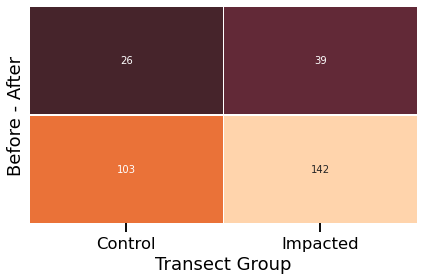

In [14]:
# GENERATE A QUICK-N-DIRTY CONFUSION MATRIX (BEFORE AFTER CONTROL IMPACT (BACI) COUNTS):
confusion_matrix = pd.crosstab(df['BA'], df['Group'], rownames=['Before - After'], colnames=['Transect Group'])
confusion_matrix

sns.heatmap(confusion_matrix, annot=True, cbar=False, square=False, fmt='d', linewidths=0.5, yticklabels=False, center=0)

plt.tight_layout()
plt.savefig(plot_path+'BACI_confusion_matrix.png');

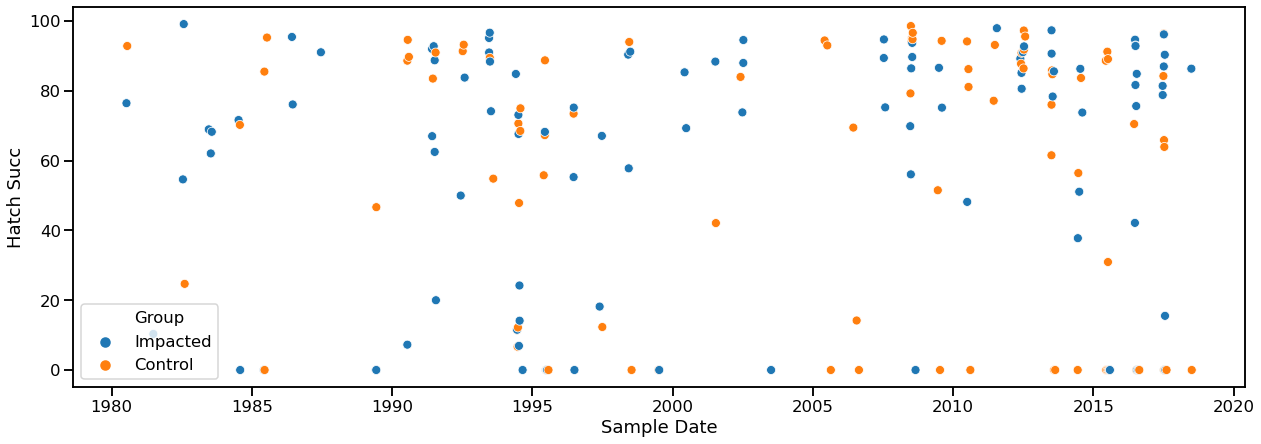

In [6]:
plt.figure(figsize=(21,7))
sns.scatterplot(x='Sample Date', y='Hatch Succ', hue='Group', data=df, marker='o')

In [7]:
hatch_success_tbl = df.pivot_table(index='Year', columns="Group", values="Hatch Succ")
hatch_success_tbl

Group,Control,Impacted
Year,,
1980,92.860000,76.470000
1981,NaN,10.340000
1982,24.690000,76.885000
1983,NaN,66.436667
1984,70.250000,35.820000
1985,60.266667,0.000000
1986,NaN,85.780350
1987,NaN,91.060000
1989,46.670000,0.000000


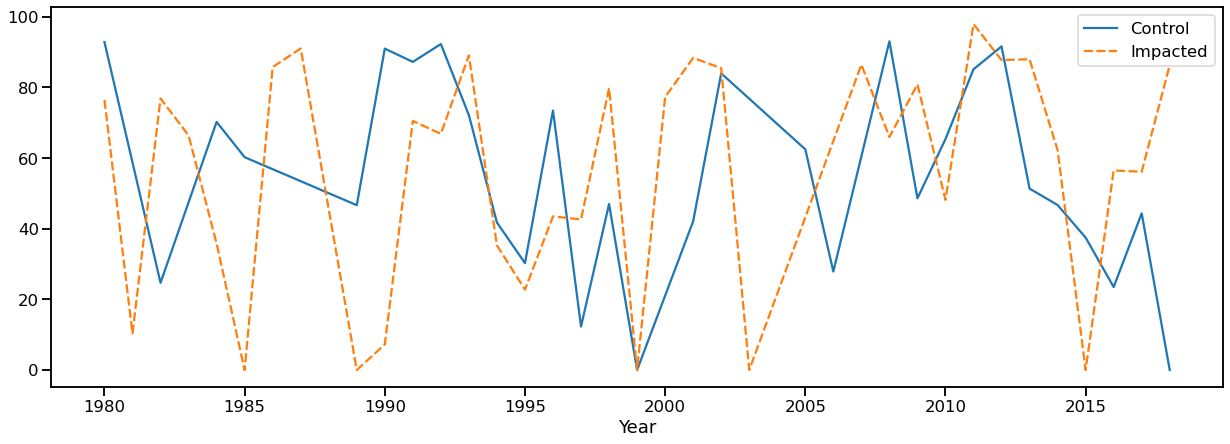

In [8]:
plt.figure(figsize=(21,7))

#hatch_success_tbl.plot(kind='bar')
sns.lineplot(data=hatch_success_tbl)

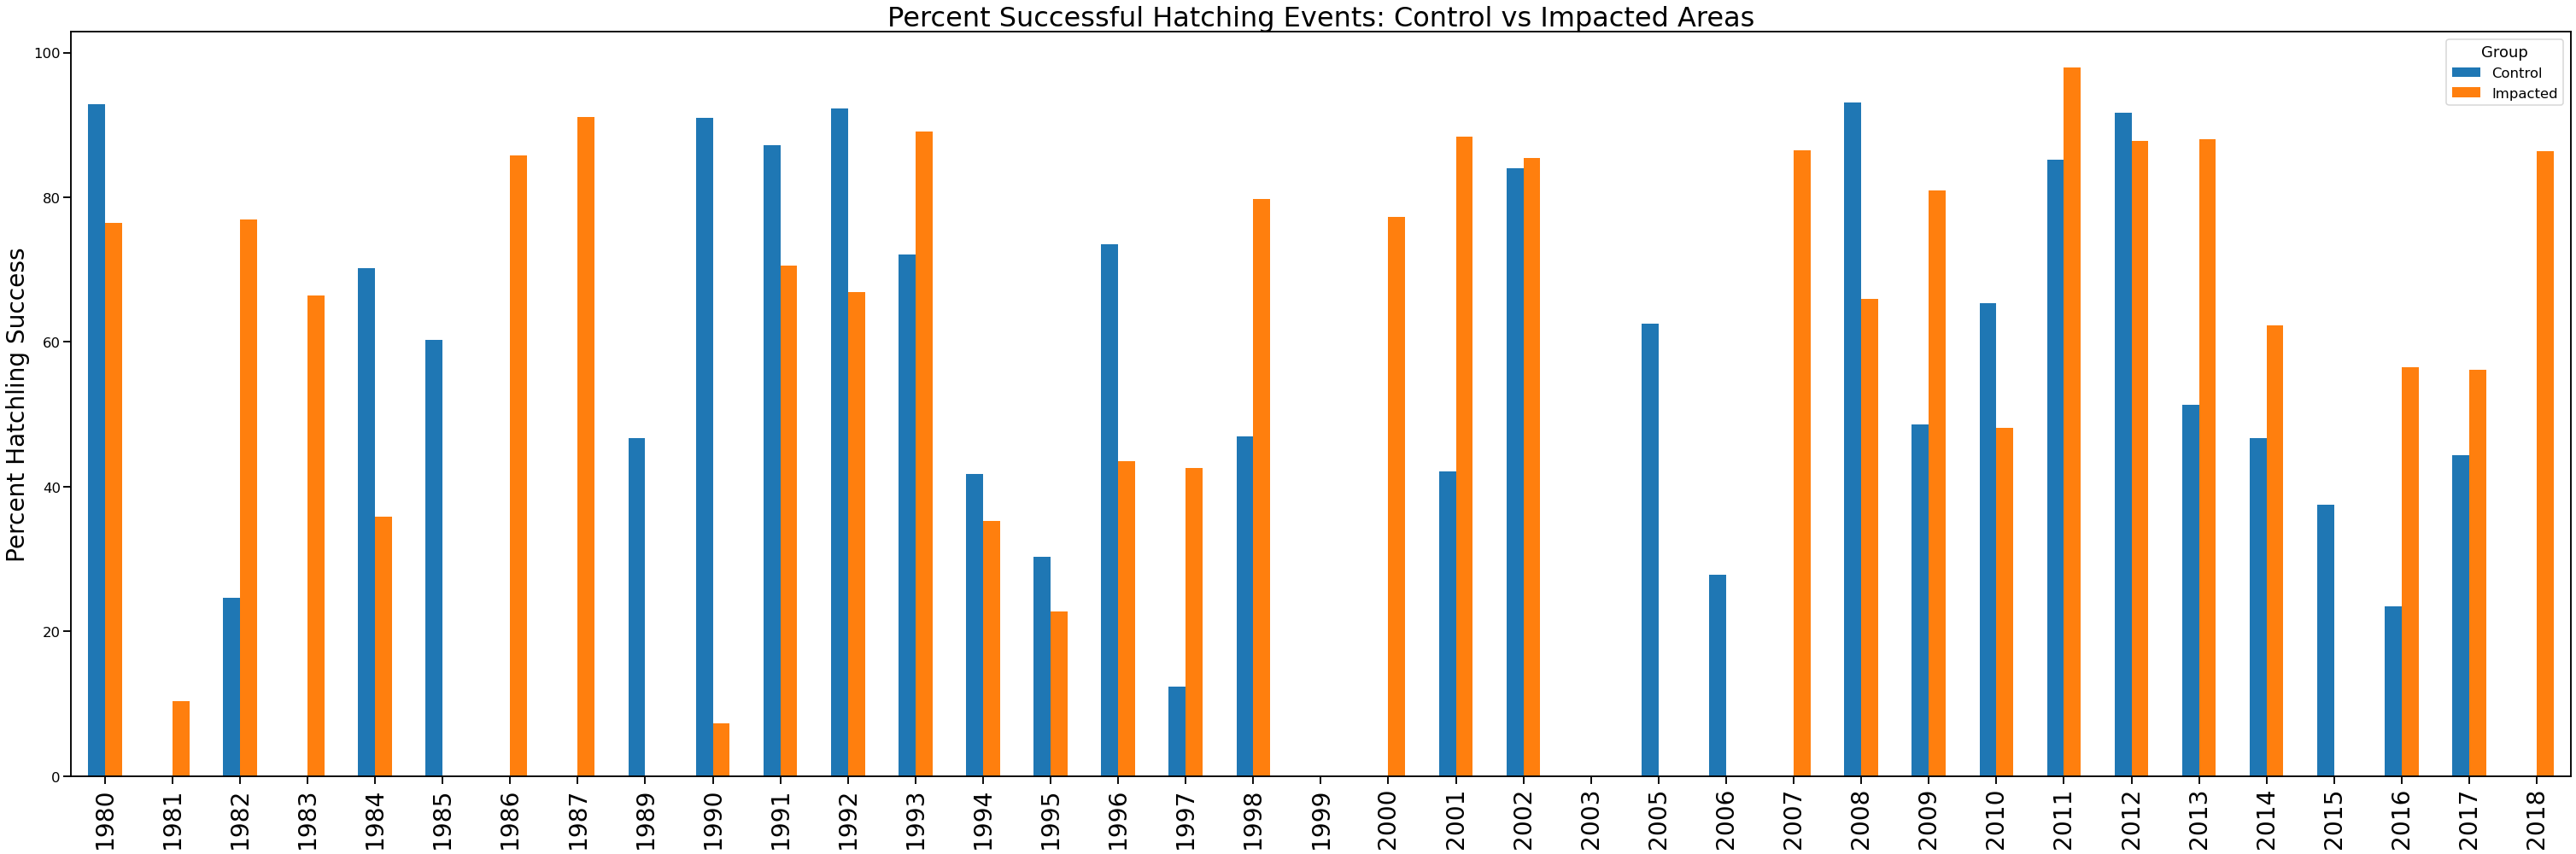

In [21]:
hatch_success_tbl.plot(kind='bar', figsize=(42,14) )

plt.xticks(fontsize=28)
plt.xlabel('')
plt.ylabel('Percent Hatchling Success', fontsize=28)

#plt.ylabel('')figsize=(21,7), 
plt.title('Percent Successful Hatching Events: Control vs Impacted Areas', fontsize=32)
plt.tight_layout()
plt.savefig(plot_path+'Turtle_Hatching_Success.png');

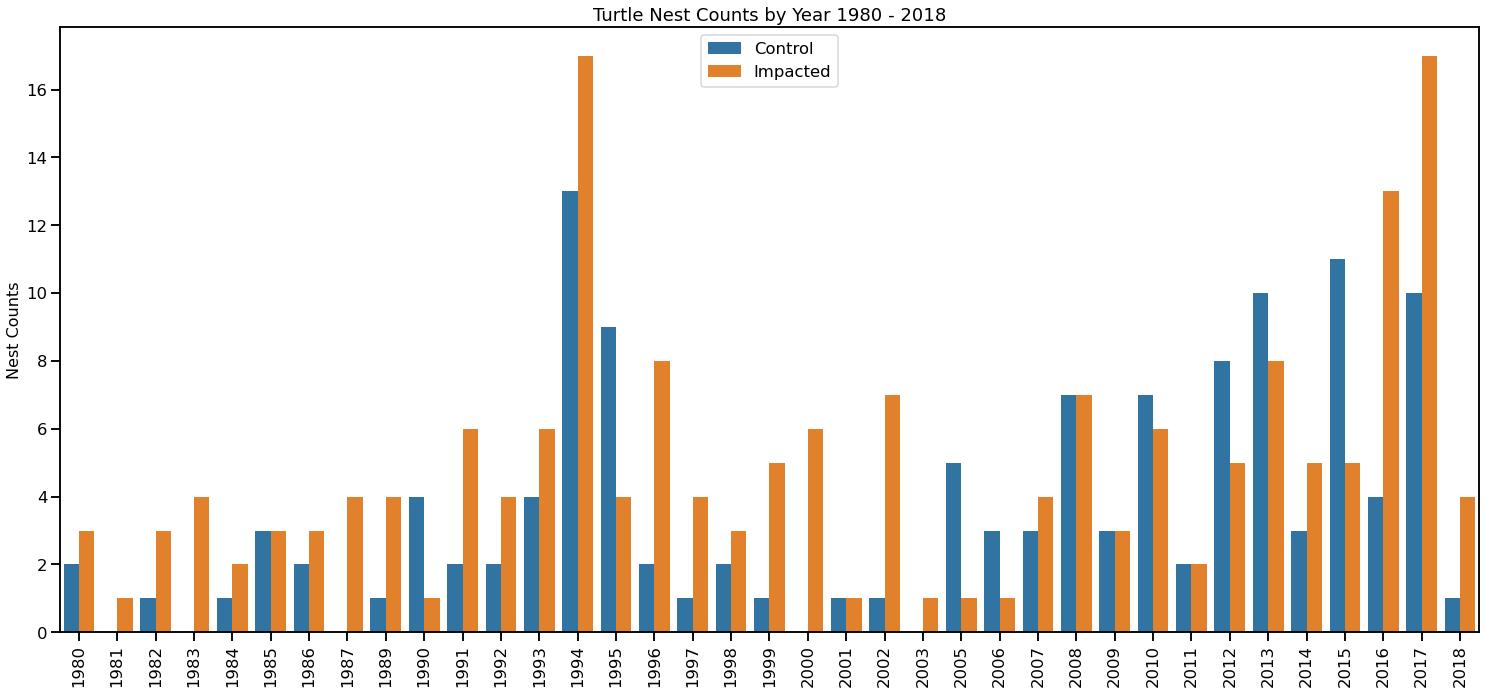

In [35]:
fig15 = plt.figure(figsize=(21,10))

sns.countplot(x='Year',  hue='Group', hue_order=['Control','Impacted'], data=df)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Nest Counts', fontsize=16)
plt.title('Turtle Nest Counts by Year 1980 - 2018')
plt.legend(loc='upper center')
plt.tight_layout(pad=2)
plt.savefig(plot_path+'Turtle_Nest_Counts.png');

In [37]:
df.loc[(df['Year'] == 2015) & (df['Group'] == 'Impacted')]

,Beach,County,Activity #,Activity,Nest #,Activity D,Year,Species,Latitude,Longitude,Relocation,Relocati_1,Relocati_2,Relocati_3,Hatch Succ,Emergence,Group,Sample Date,BA
245,Pea Island NWR,Dare,8,FA,NaN,6/10/15,2015,Cc,35.62633,-75.46848,NaN,NaN,NaN,NaN,NaN,NaN,Impacted,2015-06-10,after
247,Pea Island NWR,Dare,13,FC,NaN,6/17/15,2015,Cc,35.61638,-75.46671,NaN,NaN,NaN,NaN,NaN,NaN,Impacted,2015-06-17,after
258,Pea Island NWR,Dare,54,FC,NaN,8/4/15,2015,Cc,35.62744,-75.46835,NaN,NaN,NaN,NaN,NaN,NaN,Impacted,2015-08-04,after
259,Pea Island NWR,Dare,55,N,32.0,8/5/15,2015,Cc,35.62692,-75.46853,relocated,9/23/15,35.70578,-75.48839,0.0,0.0,Impacted,2015-08-05,after
260,Pea Island NWR,Dare,58,N,35.0,9/15/15,2015,Cm,35.62655,-75.46892,in situ,NaN,NaN,NaN,NaN,NaN,Impacted,2015-09-15,after


In [38]:
df.loc[(df['Species'] != 'Cc') ]

,Beach,County,Activity #,Activity,Nest #,Activity D,Year,Species,Latitude,Longitude,Relocation,Relocati_1,Relocati_2,Relocati_3,Hatch Succ,Emergence,Group,Sample Date,BA
120,Pea Island NWR,Dare,2,FC,NaN,6/16/97,1997,Cm,35.62500,-75.46900,NaN,NaN,NaN,NaN,NaN,NaN,Impacted,1997-06-16,before
145,Pea Island NWR,Dare,9,FC,NaN,6/28/02,2002,Cm,35.62363,-75.46807,NaN,NaN,NaN,NaN,NaN,NaN,Impacted,2002-06-28,before
146,Pea Island NWR,Dare,10,N,6.0,6/28/02,2002,Cm,35.61683,-75.46680,relocated,6/28/02,35.65340,-75.47327,73.8300,67.1100,Impacted,2002-06-28,before
156,Pea Island NWR,Dare,14,FC,NaN,8/9/05,2005,Cm,35.64430,-75.47142,NaN,NaN,NaN,NaN,NaN,NaN,Control,2005-08-09,before
166,Pea Island NWR,Dare,16,N,7.0,7/14/07,2007,Cm,35.61709,-75.46734,in situ,NaN,NaN,NaN,89.4231,88.4615,Impacted,2007-07-14,before
172,Pea Island NWR,Dare,20,N,1.0,6/30/08,2008,Cm,35.64381,-75.47180,in situ,NaN,NaN,NaN,98.5816,69.5035,Control,2008-06-30,before
173,Pea Island NWR,Dare,24,FC,NaN,7/4/08,2008,Cm,35.65074,-75.47283,NaN,NaN,NaN,NaN,NaN,NaN,Control,2008-07-04,before
176,Pea Island NWR,Dare,30,N,1.0,7/14/08,2008,Cm,35.64112,-75.47138,relocated,7/14/08,35.65060,-75.47281,95.0500,92.0800,Control,2008-07-14,before
180,Pea Island NWR,Dare,34,N,1.0,7/25/08,2008,Cm,35.64401,-75.47190,in situ,NaN,NaN,NaN,96.6387,96.6387,Control,2008-07-25,before
181,Pea Island NWR,Dare,39,N,1.0,8/30/08,2008,Cm,35.61552,-75.46696,relocated,8/30/08,35.65042,-75.47281,0.0000,0.0000,Impacted,2008-08-30,before
